#### En tant que consultant Data Analyst chez Lapage, notre mission consiste à faire le bilan de deux années de ventes en ligne.  

On souhaite identifier les points forts et les points faibles et avoir des informations sur le comportement des clients.  

L'analyse se décompose en deux parties:
-  une analyse des différents indicateurs de vente
-  une analyse ciblée sur les clients pour comprendre leur comportement en ligne  

Mais avant nous devons nettoyer le jeu de données à notre disposition, c'est le but de ce premier notebook, le deuxième étant consacré à la partie analyse.

## Sommaire

* [Étapes préliminaires](#chapter1)
    * [Importation des librairies](#section_1_1)
    * [Importation des données](#section_1_2)
* [Nettoyage des données](#chapter2)
    * [Customers](#section_2_1)
    * [Products](#section_2_2)
    * [Transactions](#section_2_3)
    * [Jointure entre df_products et df_transactions](#section_2_4)
    * [Jointure entre products_transactions avec df_customers](#section_2_5)
    * [Évolution du nombre de transactions au cours du temps](#section_2_6)
    * [Nombre de transactions par clients](#section_2_7)
    * [Age des clients](#section_2_8)
* [Exportation des données](#chapter3)

## Étapes préliminaires <a class="anchor" id="chapter1"></a>

## Importation des librairies <a class="anchor" id="section_1_1"></a>

In [1]:
# Manipulation des données
import pandas as pd
import numpy as np

# Représentation graphique
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Importation des données <a class="anchor" id="section_1_2"></a>

In [2]:
customers = pd.read_csv("C:/Users/jorda/P6/Data/customers.csv", sep = ',')
products = pd.read_csv("C:/Users/jorda/P6/Data/products.csv", sep = ',')
transactions = pd.read_csv("C:/Users/jorda/P6/Data/transactions.csv", sep = ',')

## Nettoyage des données <a class="anchor" id="chapter2"></a>

### Customers <a class="anchor" id="section_2_1"></a>

In [3]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
# On affiche les informations sur le dataframe customers
customers.info()
print(" ")

# On regarde s'il y a des doublons au niveau des lignes
print("Il y a", customers.duplicated().sum(), "lignes en doubles dans le dataframe.")
print(" ")

# On affiche le compte des valeurs uniques dans chaque colonne
print("Nombre de valeurs uniques par colonne:")
customers.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
 
Il y a 0 lignes en doubles dans le dataframe.
 
Nombre de valeurs uniques par colonne:


client_id    8623
sex             2
birth          76
dtype: int64

Dans ce dataframe il n'y a pas de doublons ni de données manquantes.
La colonne 'client_id' contient 8623 valeurs distinctes, soit le nombre de lignes du dataframe, l'unicité de la clé est respectée. On peut donc considérer 'client_id' comme la clé primaire de customers.

On regarde la distribution des valeurs de la variable birth.

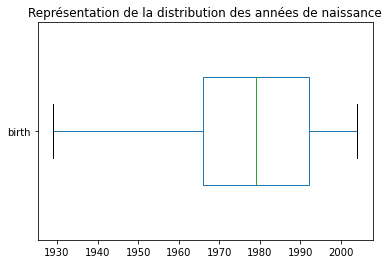

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [5]:
# Représentation en boîte à moustache des valeurs de la colonne 'birth'
customers.boxplot(column='birth', vert = False, widths=0.5)
plt.grid(False)
plt.title("Représentation de la distribution des années de naissance")
plt.show()

# On affiche des informations statistiques sur la colonne birth
customers.describe()

D'après le diagramme, il n'y a pas de valeurs aberrantes (outliers) sur la variable birth. Les années de naissance sont comprises entre les années 1929 et 2004

In [6]:
# On affiche le nombre de lignes et de colonnes
print("Le dataframe customers est composé de", customers.shape[0], "lignes et", customers.shape[1], "colonnes.")

Le dataframe customers est composé de 8623 lignes et 3 colonnes.


### Products <a class="anchor" id="section_2_2"></a>

In [7]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [8]:
# On affiche les informations sur le dataframe products
products.info()
print(' ')

# On regarde s'il y a des doublons au niveau des lignes
print("Il y a", products.duplicated().sum(), "lignes en doubles dans le dataframe.")
print(" ")

# On regarde quelles sont les valeurs uniques de la colonne 'categ'
print("Les catégories de produits sont:", products['categ'].unique())
print(" ")

# On affiche le compte des valeurs uniques dans chaque colonne
print("Nombre de valeurs uniques par colonne:")
products.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB
 
Il y a 0 lignes en doubles dans le dataframe.
 
Les catégories de produits sont: [0 1 2]
 
Nombre de valeurs uniques par colonne:


id_prod    3287
price      1455
categ         3
dtype: int64

Il n'y a pas de doublons ni de données manquantes dans ce dataframe.
L'unicité des valeurs dans la colonne 'id_prod' est respectée, on la choisit comme clé primaire du dataframe products.

On regarde la distribution des valeurs de la variable price.

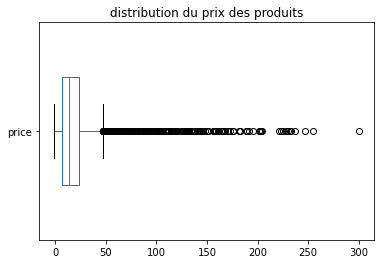

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [9]:
# Représentation en boîte à moustache des valeurs de la colonne 'price'
products.boxplot(column= 'price', vert = False, widths=0.5)
plt.grid(False)
plt.title("distribution du prix des produits")
plt.show()

# On affiche des informations statistiques sur la colonne price
products.describe()

Le diagramme nous indique qu'il y a plusieurs outliers, les prix correspondant sont compris entre 50 € et 300 € environ. Ces valeurs ne sont pas aberrantes dans notre contexte, on peut les garder dans notre jeu de données.  

Cependant, d'après les informations statistiques sur notre variable price, on a un minimum qui est négatif (-1 €).
On décide de regarder dans notre dataframe les produits qui ont un prix négatif ou nul.

In [10]:
# On affiche les lignes avec des prix inférieurs ou égaux à 0
mask = products['price'] <= 0
products.loc[mask]

,id_prod,price,categ
731,T_0,-1.0,0


Il y a un produit identifié T_0 avec un prix négatif (-1€). Pour l'instant on conserve ce produit et on regardera à quoi il correspond par la suite.

### Transactions <a class="anchor" id="section_2_3"></a>

In [11]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [12]:
# On affiche les informations sur le dataframe transactions
transactions.info()
print(" ")

# On regarde s'il y a des doublons au niveau des lignes
print("Il y a", transactions.duplicated().sum(), "lignes en doubles")
print(" ")

# On affiche le compte des valeurs uniques dans chaque colonne
print("Nombre de valeurs uniques par colonne:")
transactions.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB
 
Il y a 126 lignes en doubles
 
Nombre de valeurs uniques par colonne:


id_prod         3267
date          679371
session_id    342316
client_id       8602
dtype: int64

Il n'y a pas de valeurs manquantes dans le dataframe.  
On note que le type de la colonne 'date' n'est pas adéquat.  

Il y a 126 doublons dans le dataframe.

In [13]:
# On affiche les doublons
transactions.loc[transactions.duplicated(keep='first'), :].sort_values(by='date')

,id_prod,date,session_id,client_id
606326,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
453857,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
548383,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
255856,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
...,...,...,...,...
379783,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0
633911,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0
320833,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1
621687,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1


On observe parmi ces doublons, des lignes avec la mention 'test' dans la colonne date.  
On supprime les doublons et on regarde en détails ces lignes avec la mention 'test'.

In [14]:
# On supprime les doublons
df_transactions = transactions.drop_duplicates(keep='first')

# Recherche de lignes avec la mention test
mask = df_transactions['date'].str.contains('test')
transactions_test = df_transactions.loc[mask]
transactions_test

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
577324,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_0
593065,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_1
607892,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_0
626049,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_0


In [15]:
# On regarde à quels produits, clients et sessions correspondent ces lignes test.
print("id_prod", transactions_test['id_prod'].unique())
print("client_id", transactions_test['client_id'].unique())
print("session_id", transactions_test['session_id'].unique())

id_prod ['T_0']
client_id ['ct_0' 'ct_1']
session_id ['s_0']


Nous avons 74 transactions qui sont en réalité des tests.
Ces tests correspondent aux 'client_id' ct_0 et ct_1 et au produit T_0 qui a un prix négatif (-1 €) et sont tous réalisés durant la session s_0.  

On décide de ne pas garder ces transactions tests, ni le produit et les clients qui y sont associés.

In [16]:
# On créer un dataframe df_transactions qui ne contient pas les lignes test
mask = ~ df_transactions['date'].str.contains('test')
df_transactions = df_transactions.loc[mask]
print("df_transactions est composé de", df_transactions.shape[0], "lignes et", df_transactions.shape[1], "colonnes.")

# On ne garde pas les client ct_0 et ct_1 dans customers
mask = (customers['client_id'] == 'ct_0') | (customers['client_id'] == 'ct_1')
df_customers = customers.loc[~ mask]

# On ne garde pas le produit test T_0 dans products
mask = products['id_prod'] == 'T_0'
df_products = products.loc[~ mask]

df_transactions est composé de 679332 lignes et 4 colonnes.


Maintenant que nous avons supprimé les lignes avec la mention test dans la colonne 'date', nous pouvons convertir le type objet de cette colonne en type datetime.

In [17]:
# Conversion du type de la colonne 'date'
df_transactions['date'] = pd.to_datetime(df_transactions.date)

# On affiche le type des colonnes
df_transactions.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

## Jointure entre df_products et df_transactions <a class="anchor" id="section_2_4"></a>

In [18]:
# On réalise une jointure externe entre les deux dataframes df_products et df_transactions
products_transactions = pd.merge(df_products, df_transactions, on='id_prod', how='outer', indicator=True)

# On affiche le nombre de lignes et de colonnes
print("products_transactions est composé de", products_transactions.shape[0], "lignes et",
      products_transactions.shape[1], "colonnes.")
products_transactions.head()

products_transactions est composé de 679353 lignes et 7 colonnes.


,id_prod,price,categ,date,session_id,client_id,_merge
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,both
1,0_1421,19.99,0.0,2022-11-19 03:42:20.707442,s_299590,c_8364,both
2,0_1421,19.99,0.0,2021-09-19 14:58:46.726179,s_92304,c_3544,both
3,0_1421,19.99,0.0,2023-01-11 16:04:24.367855,s_325369,c_1025,both
4,0_1421,19.99,0.0,2021-08-01 19:33:18.877168,s_70071,c_2298,both


In [19]:
# On regarde si des lignes n'ont pas trouvé de correspondance lors de la jointure
mask = products_transactions['_merge'] != 'both'
df_no_both = products_transactions.loc[mask]
print(df_no_both.shape)
df_no_both

(242, 7)


,id_prod,price,categ,date,session_id,client_id,_merge
39705,0_1016,35.06,0.0,NaT,NaN,NaN,left_only
62805,0_1780,1.67,0.0,NaT,NaN,NaN,left_only
162765,0_1062,20.08,0.0,NaT,NaN,NaN,left_only
177522,0_1119,2.99,0.0,NaT,NaN,NaN,left_only
181172,0_1014,1.15,0.0,NaT,NaN,NaN,left_only
...,...,...,...,...,...,...,...
679348,0_2245,NaN,NaN,2021-08-25 09:06:03.504061,s_80395,c_131,right_only
679349,0_2245,NaN,NaN,2022-03-06 19:59:19.462288,s_175311,c_4167,right_only
679350,0_2245,NaN,NaN,2022-05-16 11:35:20.319501,s_209381,c_4453,right_only
679351,0_2245,NaN,NaN,2022-02-11 09:05:43.952857,s_163405,c_1098,right_only


In [20]:
# On selectionne les lignes qui ont la valeur left_only dans la colonne _merge
mask = products_transactions['_merge'] == 'left_only'
products_transactions.loc[mask].shape

(21, 7)

Il y a 21 lignes avec la valeur left_only dans la colonne '_merge', cela signifie que les 21 produits correspondant n'ont pas été vendus, ils n'ont pas trouvé de correspondance dans df_transactions. On décide de ne pas garder ces lignes dans le dataframe products_transactions.

In [21]:
# On met de côté les produits qui n'ont pas été vendu 
mask = products_transactions['_merge'] == 'left_only'
df_products_nosale = products_transactions.loc[mask]
liste = df_products_nosale['id_prod']
df_products_nosale = products.loc[products['id_prod'].isin(liste)]

# On met à jour notre dataframe sans ces produits non vendus
mask = products_transactions['_merge'] != 'left_only'
products_transactions = products_transactions.loc[mask]

# On affiche le nombre de lignes et de colonnes
print("products_transactions est composé de", products_transactions.shape[0], 
      "lignes et", products_transactions.shape[1], "colonnes.")

products_transactions est composé de 679332 lignes et 7 colonnes.


Nous avons ensuite des lignes avec la valeur 'right_only' dans la colonne _merge, cela signifie que des lignes de df_transactions n'ont pas trouvé de correspondance dans df_products. Ainsi, nous avons des transactions pour lesquelles les informations sur le produit associé sont manquantes.

In [22]:
# On sélectionne les lignes qui ont la valeur right_only dans la colonne _merge
mask = df_no_both['_merge'] == 'right_only'
df_right_only = df_no_both.loc[mask]
print("Nombre de transactions avec un manque d'informations sur le produit acheté:", df_right_only.shape[0])

# On affiche les id_prod du ou des produits pour lesquels nous n'avons pas d'informations
print("Produits concernés:", df_right_only['id_prod'].unique())

Nombre de transactions avec un manque d'informations sur le produit acheté: 221
Produits concernés: ['0_2245']


On a 221 transactions qui correspondent à un unique produit (0_2245) dont on ne connaît ni le prix ni la catégorie.  

On tente de déduire la catégorie de ce produit à partir des informations dont on dispose. Pour cela, on cherche à savoir si le premier chiffre d'un id_prod correspond à la catégorie du produit en question.

In [23]:
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [24]:
# On vérifie quels sont les premièrs caractères possibles des id_prod
print("Les id_prod peuvent avoir comme premier caractère:", df_products['id_prod'].astype(str).str[0].unique())

Les id_prod peuvent avoir comme premier caractère: ['0' '1' '2']


In [25]:
# On regarde si des id_prod commencant par 0 on une categ différente de 0
mask0 = (df_products['id_prod'].astype(str).str[0] == '0') & (df_products['categ'] != 0)
print("Nombre de id_prod commencant par 0 mais n'appartenant pas à la categ 0:", df_products.loc[mask0].shape[0])

# On regarde si des id_prod commencant par 1 on une categ différente de 1
mask1 = (df_products['id_prod'].astype(str).str[0] == '1') & (df_products['categ'] != 1)
print("Nombre de id_prod commencant par 1 mais n'appartenant pas à la categ 1:", df_products.loc[mask1].shape[0])

# On regarde si des id_prod commencant par 2 on une categ différente de 2
mask2 = (df_products['id_prod'].astype(str).str[0] == '2') & (df_products['categ'] != 2)
print("Nombre de id_prod commencant par 2 mais n'appartenant pas à la categ 2:", df_products.loc[mask2].shape[0])

Nombre de id_prod commencant par 0 mais n'appartenant pas à la categ 0: 0
Nombre de id_prod commencant par 1 mais n'appartenant pas à la categ 1: 0
Nombre de id_prod commencant par 2 mais n'appartenant pas à la categ 2: 0


On peut maintenant confirmer que le premier caractère de l'id_prod d'un produit correspond à sa catégorie, nous pouvons en déduire que notre produit identifié 0_2245 est de catégorie 0.  
À partir de cela nous pouvons attribuer un prix à notre produit, ce prix sera la moyenne des prix des produits de sa catégorie.  

Mais avant, nous devons regarder la distribution des prix dans une catégorie et le prix moyen entre catégories.

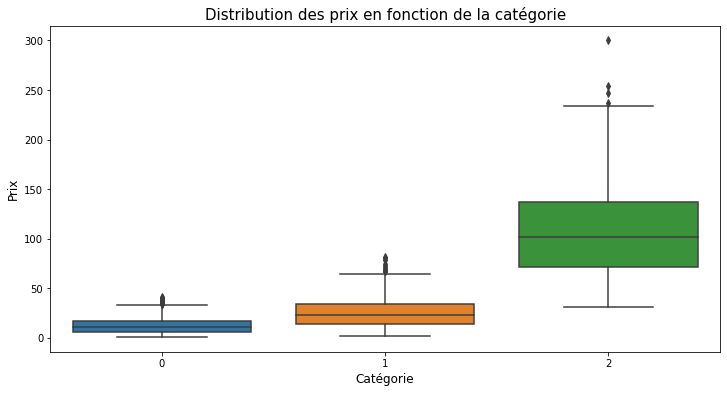

Prix moyen par catégorie:
   
 Catégorie 0 : 11.73 € 
 Catégorie 1 : 25.53 € 
 Catégorie 2 : 108.35 €


In [26]:
# Représentation en boîte à moustache des distributions des valeurs de la colonne 'price' pour chaque catégorie
plt.figure(figsize=(12, 6))

sns.boxplot(x='categ', y='price', data=df_products, orient='v')
plt.title("Distribution des prix en fonction de la catégorie", fontsize=15)
plt.xlabel("Catégorie", fontsize=12)
plt.ylabel("Prix", fontsize=12)
plt.show()

# On calcule le prix moyen pour chaque catégorie
prix_moyen_categ = df_products.groupby(['categ']).price.mean()
print("Prix moyen par catégorie:")
print("   ")
print(" Catégorie 0 :", round(prix_moyen_categ[0], 2), "€", "\n",
      "Catégorie 1 :", round(prix_moyen_categ[1], 2), "€", "\n",
      "Catégorie 2 :", round(prix_moyen_categ[2], 2), "€")

On voit sur ce diagramme, que la catégorie 0 (en bleu) a la distribution de prix la plus homogène avec 50% des prix entre 0€ et 25€ environ. On voit également que les valeurs les plus extrèmes ne dépassent pas les 50€. Et enfin, on observe bien une différence de prix moyen pour chaque catégorie.  
On en déduit qu'une imputation par la moyenne est appropriée pour un produit de la catégorie 0.

Nous pouvons maintenant compléter les informations concernant notre produit.

In [27]:
# On sélectionne les produits de catégorie 0 dans le dataframe df_products
mask = df_products['categ'] == 0
products_categ0 = df_products.loc[mask]

# On calcul la moyenne de la colonne price
moy_prix = products_categ0['price'].mean()

# On ajoute les données dans le dataframe products_transactions
products_transactions['price'] = products_transactions['price'].fillna(moy_prix) 
products_transactions['categ'] = products_transactions['categ'].fillna(0)

# On supprime la colonne '_merge'
products_transactions.drop(columns= "_merge", inplace=True)

print("Le prix attribué au produit identifié 0_2245 et de catégorie 0 est de", round(moy_prix, 2), "€")

Le prix attribué au produit identifié 0_2245 et de catégorie 0 est de 11.73 €


## Jointure entre products_transactions avec df_customers <a class="anchor" id="section_2_5"></a>

In [28]:
# On réalise une jointure externe entre les deux dataframes products_transactions et df_customers
df_final = pd.merge(products_transactions, df_customers, on='client_id', how='outer', indicator=True)
df_final.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,_merge
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991,both
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991,both
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991,both
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991,both
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991,both


In [29]:
# On regarde si des lignes n'ont pas trouvé de correspondance lors de la jointure
mask = df_final['_merge'] != 'both'
df_no_both2 = df_final.loc[mask]
print(df_no_both2.shape)
df_no_both2.head()

(21, 9)


,id_prod,price,categ,date,session_id,client_id,sex,birth,_merge
679332,NaN,NaN,NaN,NaT,NaN,c_8253,f,2001,right_only
679333,NaN,NaN,NaN,NaT,NaN,c_3789,f,1997,right_only
679334,NaN,NaN,NaN,NaT,NaN,c_4406,f,1998,right_only
679335,NaN,NaN,NaN,NaT,NaN,c_2706,f,1967,right_only
679336,NaN,NaN,NaN,NaT,NaN,c_3443,m,1959,right_only


Il y a 21 lignes qui n'ont pas trouvé de correspondance.

In [30]:
# On regarde si des lignes ont la valeur left_only dans '_merge'
mask = df_final['_merge'] == 'left_only'
df_final.loc[mask]

,id_prod,price,categ,date,session_id,client_id,sex,birth,_merge


Les 21 lignes on toutes la valeur right_only, ce qui signifie que ce sont des lignes de df_customers qui n'ont pas trouvé de correspondance dans products_transactions.  
Il y a donc 21 clients qui n'ont pas acheté de produits. On décide de ne pas garder ces 21 lignes dans df_final.

In [31]:
# On met de côté les clients qui n'ont pas acheté de produits
mask = df_final['_merge'] == 'right_only'
df_no_buy = df_final.loc[mask]

# On met à jour notre df_final sans les clients qui n'ont pas achetés.
mask = df_final['_merge'] == 'both'
df_final = df_final.loc[mask]

# On supprime la colonne '_merge'
df_final.drop(columns= "_merge", inplace=True)

# On affiche le nombre de lignes et de colonnes
print("df_final est composé de", df_final.shape[0], "lignes et", df_final.shape[1], "colonnes.")

df_final est composé de 679332 lignes et 8 colonnes.


#### Évolution du nombre de transactions au cours du temps  <a class="anchor" id="section_2_6"></a>

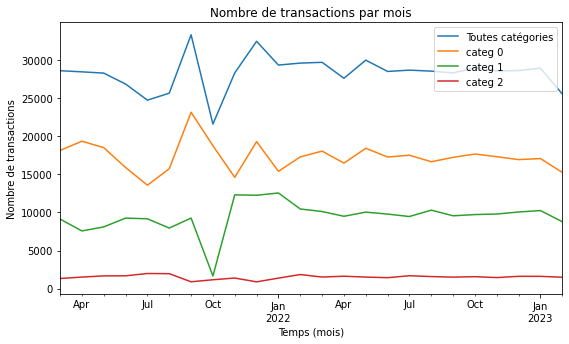

In [32]:
# Représentation graphique du nombre de transactions par mois et pour chaque catégorie
plt.figure(figsize=(9, 5))

df_final.groupby(df_final['date'].dt.to_period('M'))['date'].count().plot(label='Toutes catégories')
df_final[df_final['categ']==0].groupby(df_final['date'].dt.to_period('M'))['date'].count().plot(label='categ 0')
df_final[df_final['categ']==1].groupby(df_final['date'].dt.to_period('M'))['date'].count().plot(label='categ 1')
df_final[df_final['categ']==2].groupby(df_final['date'].dt.to_period('M'))['date'].count().plot(label='categ 2')

plt.xlabel("Temps (mois)")
plt.ylabel("Nombre de transactions")
plt.legend(loc=1)
plt.title("Nombre de transactions par mois")
plt.show()

On observe une diminution brutale du nombre de transactions (toutes catégories) au mois d'octobre 2021. Si on regarde par catégorie de produits, on voit pour la catégorie 1 une diminution anormale au mois d'octobre 2021 par rapport à la tendance générale de la courbe.  

On regarde plus en détail les transactions sur le mois d'octobre 2021.

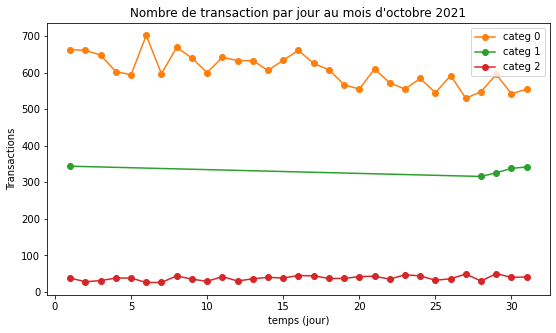

In [33]:
# On sélectionne les lignes correpondant au mois d'octobre 2021
df_oct_21 = df_final.loc[df_final['date'].dt.to_period('M') == "2021-10"]

# Représentation graphique du nombre de transactions par jour au mois d'octobre 2021 pour chaque catégorie
plt.figure(figsize=(9, 5))

df_oct_21[df_oct_21['categ']==0].groupby(df_oct_21['date'].dt.day)['date'].count().plot(label='categ 0', marker='o', color='tab:orange')
df_oct_21[df_oct_21['categ']==1].groupby(df_oct_21['date'].dt.day)['date'].count().plot(label='categ 1', marker='o', color='tab:green')
df_oct_21[df_oct_21['categ']==2].groupby(df_oct_21['date'].dt.day)['date'].count().plot(label='categ 2', marker='o', color='tab:red')

plt.xlabel("temps (jour)")
plt.ylabel("Transactions")
plt.title("Nombre de transaction par jour au mois d'octobre 2021")
plt.legend(loc=1)
plt.show()

In [34]:
# On compte le nombre de jours où il a y eu des transactions
df_oct_21_categ0 = df_oct_21.loc[df_oct_21['categ'] == 0]
print("Il y a", df_oct_21_categ0['date'].dt.day.nunique(), "jours au mois d'octobre 2021 où des produits de catégorie 0 ont été achetés.")

df_oct_21_categ1 = df_oct_21.loc[df_oct_21['categ'] == 1]
print("Il y a", df_oct_21_categ1['date'].dt.day.nunique(), "jours au mois d'octobre 2021 où des produits de catégorie 1 ont été achetés.")

df_oct_21_categ2 = df_oct_21.loc[df_oct_21['categ'] == 2]
print("Il y a", df_oct_21_categ2['date'].dt.day.nunique(), "jours au mois d'octobre 2021 où des produits de catégorie 2 ont été achetés.")

Il y a 31 jours au mois d'octobre 2021 où des produits de catégorie 0 ont été achetés.
Il y a 5 jours au mois d'octobre 2021 où des produits de catégorie 1 ont été achetés.
Il y a 31 jours au mois d'octobre 2021 où des produits de catégorie 2 ont été achetés.


On peut voir sur le graphique qu'il y a des transactions de produits de catégorie 1 pour seulement 5 jours durant le mois d'octobre 2021. Pour les deux autres catégories nous avons des transactions pour tous les jours du mois.  
On peut supposer qu'il manque des données sur des transactions concernant des produits de catégorie 1 pour ce mois d'octobre.  

On crée une copie du dataframe dans laquelle on garde les données du mois d'octobre pour certaines analyses, puis on supprime les données du mois d'octobre dans le dataframe initial.

In [35]:
# On créer une copie de df_final avec les données d'octobre 2021 pour réaliser certaines analyses
df_oct_in = df_final.copy()

# On met à jour df_final en ne gardant que les dates différentes d'octobre 2021
mask = df_final['date'].dt.to_period("M") != '2021-10'
df_final = df_final.loc[mask]

#### Nombre de transactions par clients <a class="anchor" id="section_2_7"></a>

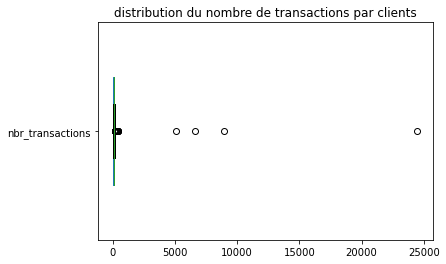

     client_id  nbr_transactions
0       c_1609             24472
1       c_6714              8903
2       c_3454              6635
3       c_4958              5090
4       c_3263               392
...        ...               ...
8593    c_4223                 1
8594    c_4436                 1
8595    c_3927                 1
8596    c_4478                 1
8597    c_2793                 1

[8598 rows x 2 columns]


In [36]:
# On compte le nombre de fois où les id_client apparaissent dans des transactions
df_nbr_achats = df_final['client_id'].value_counts().rename_axis('client_id').reset_index(name='nbr_transactions')

# On affiche la boîte à moustache du nombre de transactions par clients
df_nbr_achats.boxplot(column='nbr_transactions', vert = False, widths=0.5)
plt.grid(False)
plt.title("distribution du nombre de transactions par clients")
plt.show()

print(df_nbr_achats)

Il y a 4 clients qui ont effectué plus de 5000 achats en moins de 2 ans. Ces 4 clients sont identifiés c_1609, c_6714, c_3454 et c_4958. Ce comportement ne semble pas correspondre à des achats pour des besoins personnels.

On crée une copie de df_final avec les données des 4 clients, et on supprime les données de ces 4 clients dans le dataframe initial. On crée également un dataframe qui contiendra uniquement les données de ces 4 plus gros clients.

In [37]:
# On créer une copie de df_final avec les données des 4 clients pour réaliser certaines analyses
df_4clients_in = df_final.copy()

# On crée un dataframe avec seulement les données des 4 plus gros clients
liste = ['c_1609', 'c_6714', 'c_3454', 'c_4958']
mask = df_final['client_id'].isin(liste)
df_4clients = df_final.loc[mask]

# On met à jour df_final sans les 4 plus gros clients 
liste = ['c_1609', 'c_6714', 'c_3454', 'c_4958']
mask = df_final['client_id'].isin(liste)
df_final = df_final.loc[~ mask]

#### Age des clients <a class="anchor" id="section_2_8"></a>

In [38]:
# On ajoute une colonne 'Age' qui calcul l'age des clients à partir des dates de naissance et de transactions
df_final['Age'] = df_final['date'].dt.year - df_final['birth']
df_final.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,Age
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991,31
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991,31
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991,30
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991,30
5,0_166,1.83,0.0,2022-10-15 10:35:31.526968,s_282822,c_6389,f,1991,31


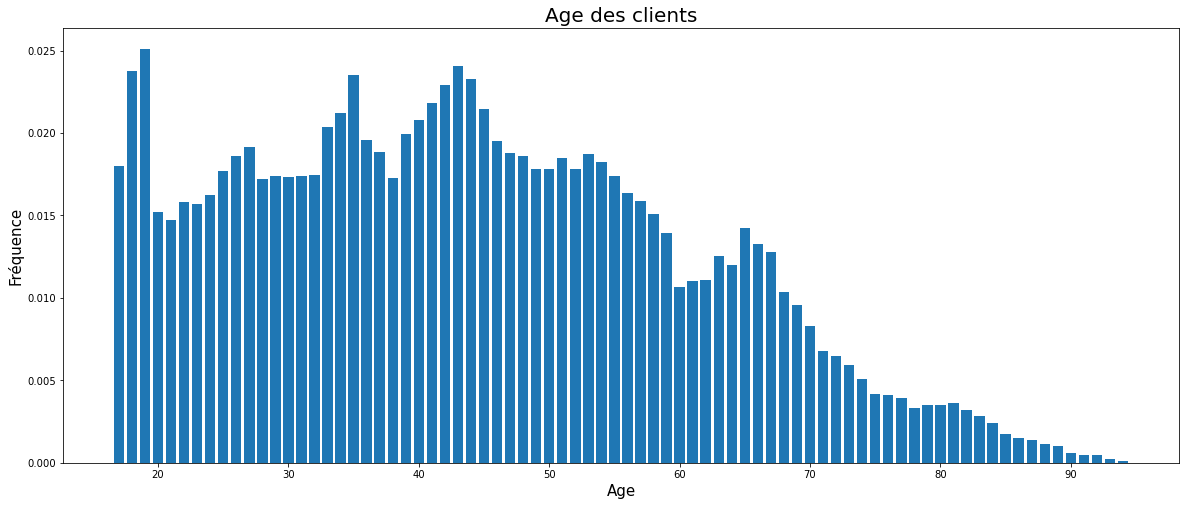

In [39]:
# On sélectionne l'age et les id_client
df_age = df_final[['client_id', 'Age']].copy()
df_age.drop_duplicates(inplace=True)

# On calcul la fréquence d'apparition pour chaque age
df_age = df_age['Age'].value_counts(normalize=True).rename_axis('Age').reset_index(name='Fréquence').sort_values('Age')

# Représentation barplot de la variable Age
plt.figure(figsize=(20, 8))
plt.bar(df_age['Age'], df_age['Fréquence'])
plt.title("Age des clients", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Fréquence", fontsize=15)
plt.show()

On observe une part importante de clients de 18 et 19 ans. On a également un grand nombre de clients qui ont entre 33 et 35 ans et entre 40 et 45 ans.

## Exportation des données <a class="anchor" id="chapter3"></a>

In [40]:
# Exportation des données au format csv
df_final.to_csv("C:/Users/jorda/P6/Data/df_final.csv", index=False)
df_oct_in.to_csv("C:/Users/jorda/P6/Data/df_oct_in.csv", index=False)
df_4clients_in.to_csv("C:/Users/jorda/P6/Data/df_4clients_in.csv", index=False)
df_products_nosale.to_csv("C:/Users/jorda/P6/Data/df_products_nosale.csv", index=False)